MACHINE LEARNING

In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

1. DECISION MAKING: WHICH DS IS THE BEST?

In [22]:
# TRAIN DFs
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# TEST DFs
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [23]:
# Placeholder lists for training and test datasets
train_dfs = [
    X_train_with_outliers_sel,
    X_train_without_outliers_sel,
    X_train_with_outliers_norm_sel,
    X_train_without_outliers_norm_sel,
    X_train_with_outliers_minmax_sel,
    X_train_without_outliers_minmax_sel
]
test_dfs = [
    X_test_with_outliers_sel,
    X_test_without_outliers_sel,
    X_test_with_outliers_norm_sel,
    X_test_without_outliers_norm_sel,
    X_test_with_outliers_minmax_sel,
    X_test_without_outliers_minmax_sel
]

# Placeholder for results
results = []
models = []

# Loop through datasets
for df_index in range(len(train_dfs)):
    # Initialize model
    model = LogisticRegression()

    # Extract training and test datasets
    train_df = train_dfs[df_index]
    test_df = test_dfs[df_index]

    # Fit model
    model.fit(train_df, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(train_df)
    y_test_pred = model.predict(test_df)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Append results
    results.append({
        "Dataset Index": df_index,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1-Score": test_f1
    })

    # Store the model
    models.append(model)

# Sort by Train Accuracy (descending)
sorted_results_df = pd.DataFrame(results).sort_values(by="Train Accuracy", ascending=False)
print(sorted_results_df)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

   Dataset Index  Train Accuracy  Test Accuracy  Test Precision  Test Recall  \
4              4        0.900334       0.896309        0.881972     0.896309   
2              2        0.900334       0.896309        0.882230     0.896309   
1              1        0.900152       0.895702        0.881984     0.895702   
0              0        0.900152       0.896916        0.882357     0.896916   
3              3        0.900152       0.895702        0.882141     0.895702   
5              5        0.900152       0.895702        0.881984     0.895702   

   Test F1-Score  
4       0.868809  
2       0.868558  
1       0.866693  
0       0.870622  
3       0.866562  
5       0.866693  


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


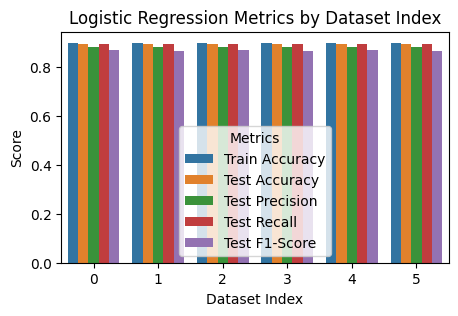

In [24]:
# Plot the results using Seaborn
plt.figure(figsize=(5, 3))
sns.barplot(
    data=sorted_results_df.melt(
        id_vars=["Dataset Index"], 
        value_vars=["Train Accuracy", "Test Accuracy", "Test Precision", "Test Recall", "Test F1-Score"]
    ),
    x="Dataset Index", 
    y="value", 
    hue="variable"
)
plt.title("Logistic Regression Metrics by Dataset Index")
plt.ylabel("Score")
plt.xlabel("Dataset Index")
plt.legend(title="Metrics")
plt.show()